Epoch 0: Loss=24.1603 w=1.8766 b=0.1248
Epoch 50: Loss=1.1689 w=2.1024 b=0.3559
Epoch 100: Loss=1.1221 w=2.0798 b=0.5063
Epoch 150: Loss=1.0936 w=2.0621 b=0.6235
Epoch 200: Loss=1.0763 w=2.0484 b=0.7149
Epoch 250: Loss=1.0658 w=2.0377 b=0.7862


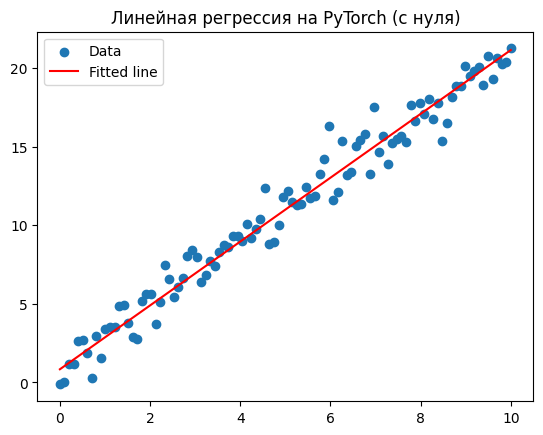

In [7]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# ===== 1. Генерация данных =====
torch.manual_seed(0)
X = torch.linspace(0, 10, 100).unsqueeze(1)   # [100, 1]
true_w, true_b = 2.0, 1.0
y = true_w * X + true_b + torch.randn_like(X) * 1.0  # шум

# ===== 2. Модель =====
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.randn(1, requires_grad=True))  # вес
        self.b = nn.Parameter(torch.randn(1, requires_grad=True))  # смещение

    def forward(self, x):
        return self.w * x + self.b

model = LinearRegressionModel()

# ===== 3. Обучение =====
lr = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.MSELoss()

for epoch in range(300):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss={loss.item():.4f} w={model.w.item():.4f} b={model.b.item():.4f}")

# ===== 4. Визуализация =====
plt.scatter(X, y, label='Data')
plt.plot(X, model(X).detach(), color='red', label='Fitted line')
plt.legend()
plt.title("Линейная регрессия на PyTorch (с нуля)")
plt.show()


In [8]:
# Добавим столбец единиц в X, чтобы учесть b
X_ = torch.cat([X, torch.ones_like(X)], dim=1)  # [100, 2]

# Решение: (X^T X)^(-1) X^T y
w_analytical = torch.linalg.inv(X_.T @ X_) @ X_.T @ y
print(f"Аналитическое решение: w={w_analytical[0].item():.4f}, b={w_analytical[1].item():.4f}")


Аналитическое решение: w=1.9997, b=1.0385
